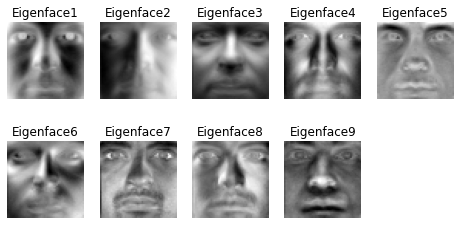

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
import cv2
import sklearn
from readFaceImages import readFaceImages

# first d eigenvectors
D = 9

images, people, numbers, subsets = readFaceImages("./faces/")
im_vects = []

### Part 1

for im in images:
  im = np.array(im)
  # flatten
  im_vect = im.flatten()
  im_vects.append(im_vect)
im_vects = np.array(im_vects)
#normalize by subtracting mean of image vectors
avg_face = np.mean(im_vects, axis=0)
im_vects = im_vects - avg_face

# SVD
u, s, vh = la.svd(im_vects)
vh = np.array(vh)
d_vectors = []
for i in range(D):
  d_vectors.append(np.reshape(vh[i], (50, 50)))
d_vectors = np.array(d_vectors)

fig = plt.figure(figsize=(8, 4))
for i in range(D):
  fig.add_subplot(2, 5, i+1)
  plt.imshow(d_vectors[i], cmap='gray')
  plt.axis('off')
  plt.title("Eigenface" + str(i+1))

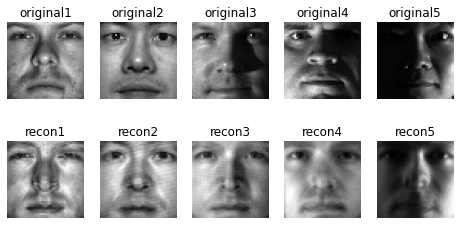

In [84]:
### Part 2
subs = [0, 7, 19, 31, 45, 64]
D = 9

fig2 = plt.figure(figsize=(8,4))

# for each subset
for i in range(5):
  im_vects = []
  # each image in subset
  for k in range(len(images)):
    if subsets[k]-1 != i:
      continue
    im = np.array(images[k])
    # flatten
    im_vect = im.flatten()
    im_vects.append(im_vect)
  im_vects = np.array(im_vects)
  sub_avg_face = np.mean(im_vects, axis=0)
  im_vects = im_vects - sub_avg_face

  # SVD
  u, s, vh = la.svd(im_vects)
  vh = np.array(vh)
  d_vectors = []
  for j in range(D):
    d_vectors.append(vh[j])
  d_vectors = np.array(d_vectors)

  output = sub_avg_face
  subset_face_pick = images[i*64 + subs[i]+1]
  for j in range(D):
    ### reconstruct
    weight_j = np.dot(subset_face_pick.flatten(), d_vectors[j])
    output += d_vectors[j]*weight_j

  fig2.add_subplot(2, 5, i+1)
  plt.imshow(subset_face_pick, cmap='gray')
  plt.title("original" + str(i+1))
  plt.axis('off')
  fig2.add_subplot(2, 5, i+1+5)
  plt.imshow(output.reshape(50,50), cmap='gray')
  plt.title("recon" + str(i+1))
  plt.axis('off')
  

In [69]:
### Part 3
sub1_images = []
for i in range(len(images)):
  if subsets[i] == 1:
    sub1_images.append(images[i].flatten())
sub1_images = np.array(sub1_images)
# normalize
sub1_avg_face = np.mean(sub1_images, axis=0)
sub1_images = sub1_images - sub1_avg_face

D_low = 9
D_high = 30
#SVD
u, s, vh = la.svd(sub1_images)
vh = np.array(vh)

d_vectors_low = []
for j in range(D_low):
  d_vectors_low.append(vh[j])
d_vectors_low = np.array(d_vectors_low)

d_vectors_high = []
for j in range(D_high):
  d_vectors_high.append(vh[j])
d_vectors_high = np.array(d_vectors_high)

# get all sub1 images fresh
# revert to pre-normalized images
sub1_images = sub1_images + sub1_avg_face
sub1_weights_low = []
sub1_weights_high = []
for sub1_im in sub1_images:
  weights_low = []
  for j in range(D_low):
    weights_low.append(np.dot(sub1_im, d_vectors_low[j]))
  sub1_weights_low.append(weights_low)

  weights_high = []
  for j in range(D_high):
    weights_high.append(np.dot(sub1_im, d_vectors_high[j]))
  sub1_weights_high.append(weights_high)

sub1_weights_low = np.array(sub1_weights_low)
sub1_weights_high = np.array(sub1_weights_high)

## now sub1_weights holds weights of each eigenface that create each face in subset 1

In [91]:
subs_sizes = [70, 120, 120, 140, 190]
subset_scores_low_d = {}
for i in range(1, 6):
  subset_scores_low_d[i] = 0

for i in range(len(images)):
  im_weights = np.array([np.dot(images[i].flatten(), d_vectors_low[j]) for j in range(D_low)])
  dists = []
  for w in range(len(sub1_weights_low)):
    dists.append(np.sum(np.square(im_weights - sub1_weights_low[w])))
  #argmin of dist is the index of one of first 70 training images that had closest weights to new image
  if people[i] == (int(np.argmin(dists)/7)+1):
    subset_scores_low_d[subsets[i]] += 1 
for i in range(1, 6):
  subset_scores_low_d[i] = 100 * subset_scores_low_d[i] / subs_sizes[i-1]
print(subset_scores_low_d)

{1: 100.0, 2: 90.0, 3: 42.5, 4: 20.0, 5: 14.736842105263158}


In [93]:
subset_scores_high_d = {}
for i in range(1, 6):
  subset_scores_high_d[i] = 0

for i in range(len(images)):
  im_weights = np.array([np.dot(images[i].flatten(), d_vectors_high[j]) for j in range(D_high)])
  dists = []
  for w in range(len(sub1_weights_high)):
    dists.append(np.sum(np.square(im_weights - sub1_weights_high[w])))
  #argmin of dist is the index of one of first 70 training images that had closest weights to new image
  if people[i] == (int(np.argmin(dists)/7)+1):
    subset_scores_high_d[subsets[i]] += 1 
for i in range(1, 6):
  subset_scores_high_d[i] = 100 * subset_scores_high_d[i] / subs_sizes[i-1]
print(subset_scores_high_d)


{1: 100.0, 2: 94.16666666666667, 3: 50.833333333333336, 4: 20.0, 5: 14.736842105263158}
